In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
    
def perform_regression(filepath,depvar):
    
    depvar_col = df[depvar].values    
        
    #Descriptive Analysis of Data (Basic). (For eg., using. describe(), .info() etc.)
    
    print(df.describe())
    print(df.info())
    print("DATA ")
    print(df.head())
    
    #Removal of Duplicates.
    df.drop_duplicates()
    
    #First step is to use label encoder to convert town names into numbers
    le = LabelEncoder()
    
    #Handling Categorical Variables (Encoding)
    categor_column = categorical_column
    categor_column = le.fit_transform(categor_column)
    #Now use one hot encoder to create dummy variables for each of the town
    X = ind
    ct = ColumnTransformer([(categorical_var, OneHotEncoder(), [0])], remainder = 'passthrough')
    X = ct.fit_transform(X)
    print(X)
    
    #Splitting of Data into Train and Test.
    
    X_train, X_test, y_train, y_test = train_test_split(X,depvar_col,test_size=0.2) 
    print("X_train is:", X_train)
    print("X_test is:",X_test)
    print("y_train is:",y_train)
    print("y_test is:",y_test)
    
    #Create a Linear Regression Model on the Train Data
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    print(clf.predict(X_test))
    print(clf.score(X_test, y_test))
    
    #And Evaluate it on the Test Data using any Appropriate Evaluation Metric
    score1 = clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)
    
    #Mean Absolute Error(MAE)
    from sklearn.metrics import mean_absolute_error
    print("MAE",mean_absolute_error(y_test,y_predict))
    
    #Mean Squared Error(MSE)
    from sklearn.metrics import mean_squared_error
    print("MSE",mean_squared_error(y_test,y_predict))
    
    #Root Mean Squared Error(RMSE)
    print("RMSE",np.sqrt(mean_squared_error(y_test,y_predict)))
    
    
    #creating any Regression Model of my choice which may or may not perform better on this Data. (  RandomForestClassifier)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=20)
    model.fit(X_train, y_train)
    print(model.predict(X_test))
    print(model.score(X_test, y_test))
    score2 = model.score(X_test, y_test)
    y_predicted = model.predict(X_test)
    
    
    #The Comparison between the Statistical Model and the Your Chosen Model 
    scores = [score1,score2 ]
    names = ['LinearRegression','RandomForrest']
    ds = pd.DataFrame()
    ds['names'] = names
    ds['scores'] = scores
    print(ds)
    cm = sns.light_palette("green", as_cmap=True)
    s = ds.style.background_gradient(cmap=cm)
    s
    sns.set(style="whitegrid")
    ax = sns.barplot(y="names", x="scores", data=ds)
    



               town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000
              area          price
count    13.000000      13.000000
mean   3146.153846  629230.769231
std     453.900475   57621.109914
min    2600.000000  550000.000000
25%    2800.000000  585000.000000
50%    3100.000000  615000.000000
75%    3600.000000  680000.000000
max    4000.000000  725000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    13 non-null     object
 1   are

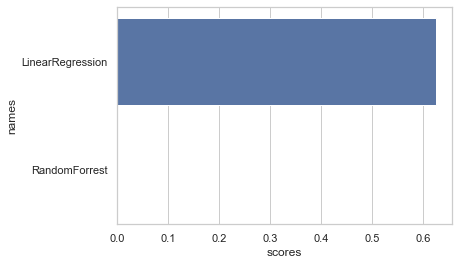

In [207]:

filepath = "homeprices.csv"
depvar = 'price'
if filepath.endswith('.xlsx'):
    df = pd.read_excel(filepath)
elif filepath.endswith('.csv'):
    df  = pd.read_csv(filepath)
else:
    pass 
#here town is the categorical variable
categorical_var = 'town'
categorical_column = df['town']

print(df)

#independent variables
ind = df[['town','area']].values
perform_regression(filepath,depvar)